### Librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Welch
from scipy import signal
from scipy.interpolate import interp1d
import numpy as np

#### 00dg

In [2]:
#Directorio a recorrer
path_mat = '/home/bryan/Escritorio/Ayudantías 2021/Low Speed/00/'

def Ficheros(path, formato):
    contenido = os.listdir(path)

    #Acumulador del nombre de las   imagenes a utilizar
    archivos = []

    #Se recorre el path para obtener los nombre y se los aggrega al acumulador, en este caso la lista
    for fichero in contenido:
        if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith(formato):
            archivos.append(fichero)
            
    return archivos


#Verificar si obtiene los archivos
Archivos = Ficheros(path_mat, '.csv')

dstream = []
ustream = []

for archivo in Archivos:
    if 'downstream' in archivo:
        dstream.append(archivo)
    elif 'upstream' in archivo:
        ustream.append(archivo)

In [3]:
dstream.sort()
ustream.sort()

In [4]:
dstream, ustream

(['Bent_cylinder_L100_downstream0deg_wind_speeds.csv',
  'Bent_cylinder_L100_downstream0deg_x0.csv',
  'Bent_cylinder_L100_downstream0deg_x2.csv'],
 [])

#### Velocidades DownStream

In [5]:
velocity = pd.read_csv(path_mat + dstream[0])
velocity.head()

,PVDF peak mA,PVDF peak V,PVDF peak power,n/a,Solar mA 1,Solar V 1,solar mW 1,tunnel P,tunnel V,Patm,Tatm,num of 470k,Solar mA 2,Solar V 2,Solar mW 2
0,0.00007,0.0,0.0,0.0,inf,0.00107,inf,0.91339,1.23896,100125.0,20.0,0.0,inf,0.00110,inf
1,0.00007,0.0,0.0,0.0,inf,0.00107,inf,0.88761,1.22135,100125.0,20.0,0.0,inf,0.00108,inf
2,0.00007,0.0,0.0,0.0,inf,0.00109,inf,0.89244,1.22467,100125.0,20.0,0.0,inf,0.00111,inf
3,0.00007,0.0,0.0,0.0,inf,0.00109,inf,0.88455,1.21925,100125.0,20.0,0.0,inf,0.00111,inf
4,0.00007,0.0,0.0,0.0,inf,0.00108,inf,1.45528,1.56388,100125.0,20.0,0.0,inf,0.00111,inf


In [6]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

,tunnel V
count,32.000000
mean,2.364268
std,1.356437
min,0.905106
25%,1.252231
50%,2.100075
75%,3.828842
max,4.688885


In [7]:
df_prueba = pd.read_csv(path_mat + dstream[1])
df_prueba.describe()

,0.41748
count,2.499999e+06
mean,2.076121e+00
std,1.207901e+00
min,2.759100e-01
25%,9.159300e-01
50%,1.921680e+00
75%,3.010270e+00
max,7.072590e+00


## Graficas Downstream

## x0

Velocity:  1.0640188480000001
Max Frequency value:  78.125


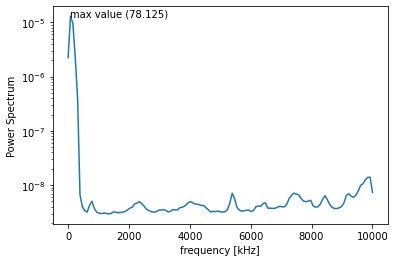


Velocity:  1.04889538
Max Frequency value:  234.375


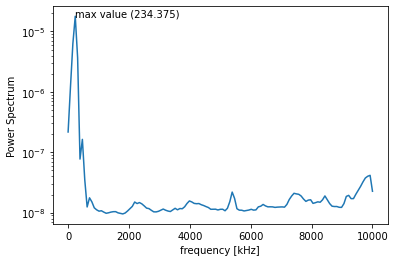


Velocity:  1.051746596
Max Frequency value:  234.375


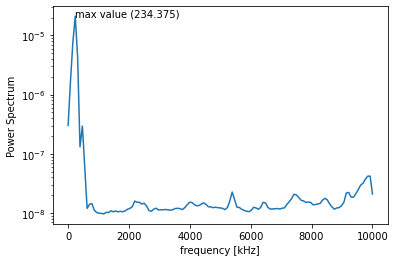


Velocity:  1.0470918999999999
Max Frequency value:  78.125


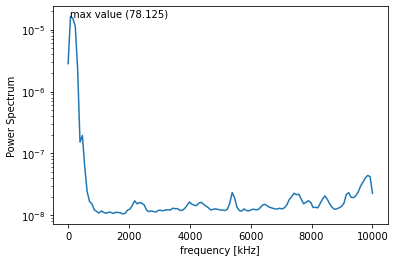


Velocity:  1.343060144
Max Frequency value:  156.25


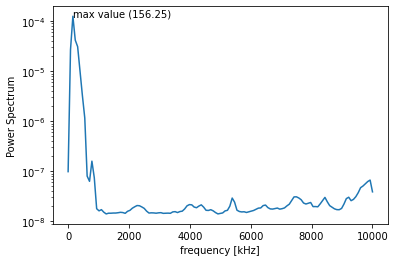


Velocity:  1.338886376
Max Frequency value:  312.5


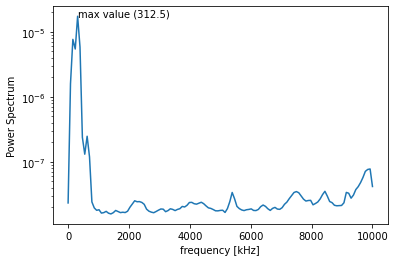


Velocity:  1.3319644480000001
Max Frequency value:  156.25


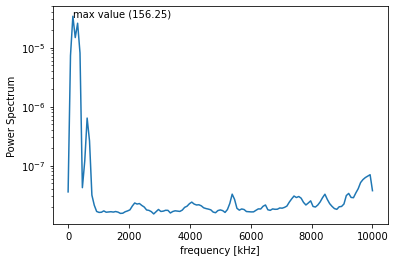


Velocity:  1.326270604
Max Frequency value:  312.5


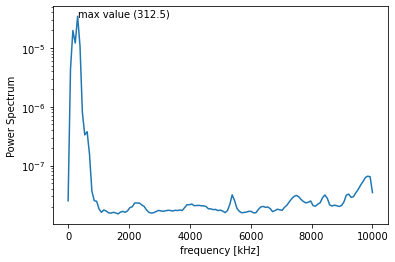


Velocity:  2.1101746560000003
Max Frequency value:  546.875


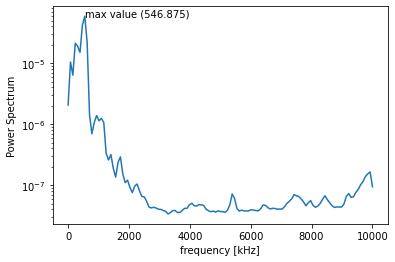


Velocity:  2.1033214320000004
Max Frequency value:  546.875


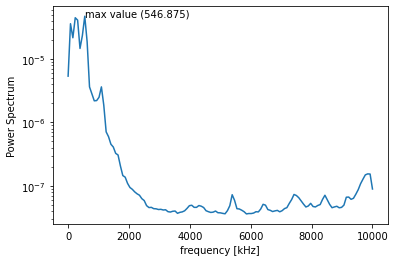


Velocity:  2.096828904
Max Frequency value:  546.875


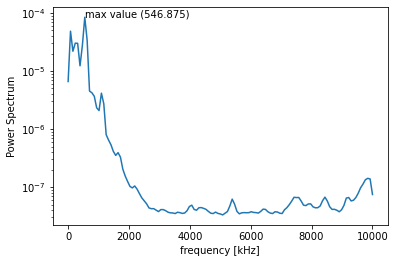


Velocity:  2.11105922
Max Frequency value:  312.5


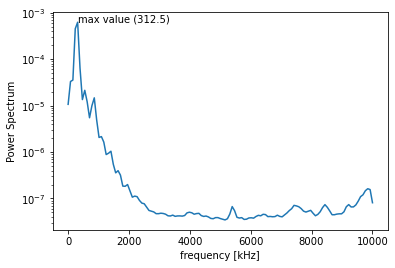


Velocity:  3.033805468
Max Frequency value:  78.125


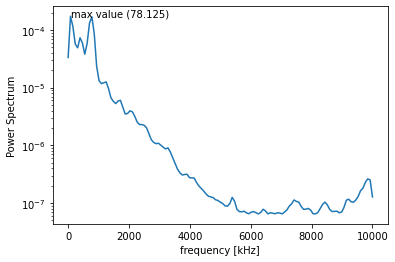


Velocity:  3.0204940679999996
Max Frequency value:  390.625


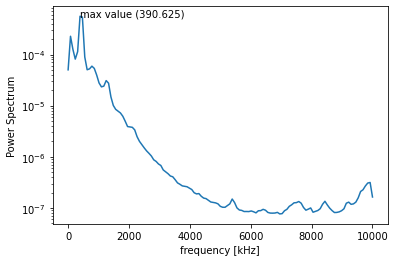


Velocity:  3.02456478
Max Frequency value:  468.75


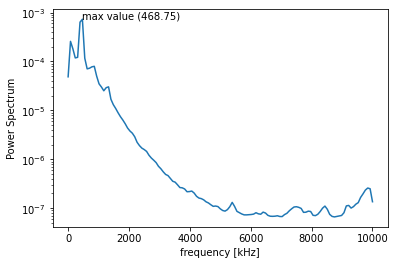


Velocity:  3.014971984
Max Frequency value:  468.75


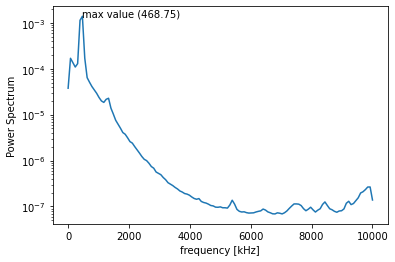


Velocity:  3.850137808
Max Frequency value:  78.125


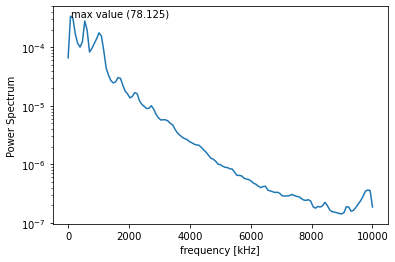


Velocity:  3.841232052
Max Frequency value:  546.875


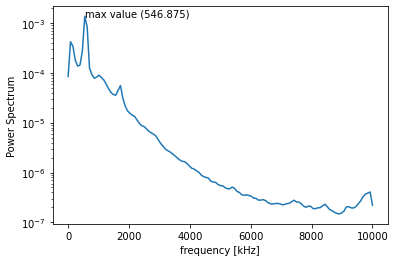


Velocity:  3.8453886440000002
Max Frequency value:  546.875


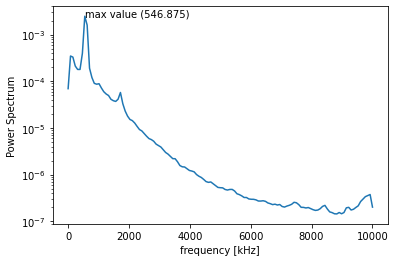


Velocity:  3.827705952
Max Frequency value:  78.125


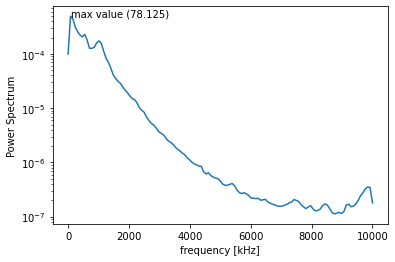


Velocity:  3.8322490040000003
Max Frequency value:  546.875


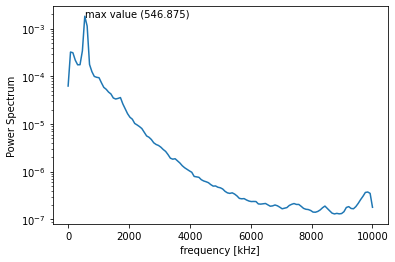


Velocity:  4.685329395999999
Max Frequency value:  156.25


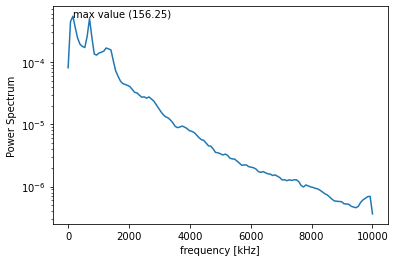


Velocity:  4.673520895999999
Max Frequency value:  703.125


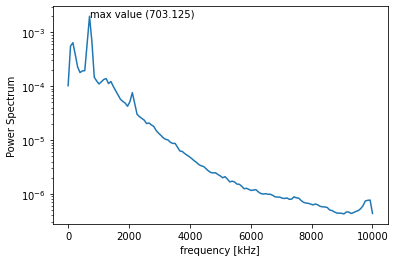


Velocity:  4.688884828
Max Frequency value:  703.125


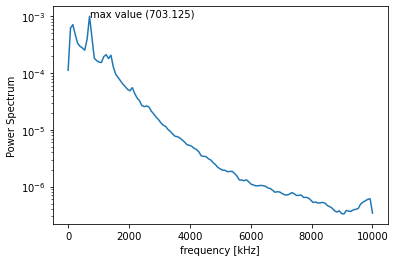


Velocity:  4.68080352
Max Frequency value:  703.125


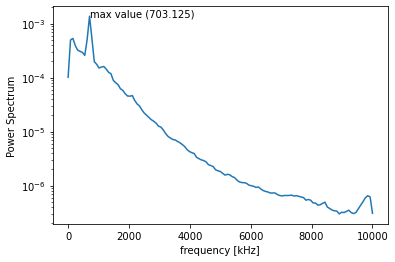

In [14]:
df = pd.read_csv(path_mat + dstream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,2500000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

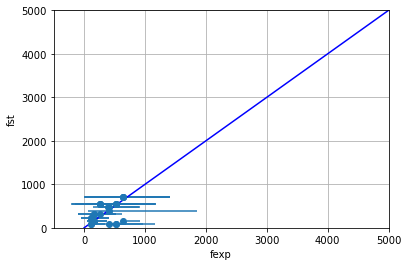

In [15]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



In [11]:
df1 = pd.read_csv(path_mat + dstream[2], header=None)
df1.describe()

,0
count,700000.000000
mean,0.688441
std,0.121275
min,0.368360
25%,0.587340
50%,0.641060
75%,0.800370
max,1.055780


## x2

Velocity:  3.850137808
Max Frequency value:  78.125


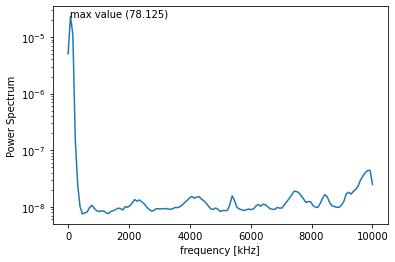


Velocity:  3.841232052
Max Frequency value:  156.25


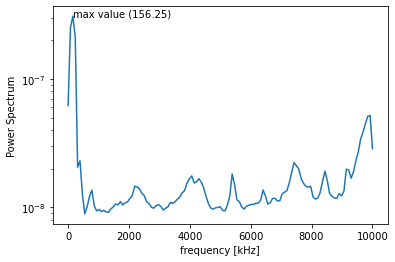


Velocity:  3.8453886440000002
Max Frequency value:  156.25


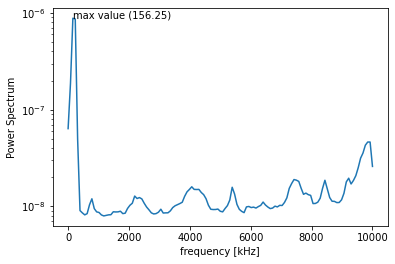


Velocity:  3.827705952
Max Frequency value:  156.25


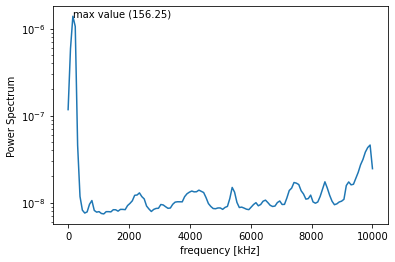


Velocity:  3.8322490040000003
Max Frequency value:  156.25


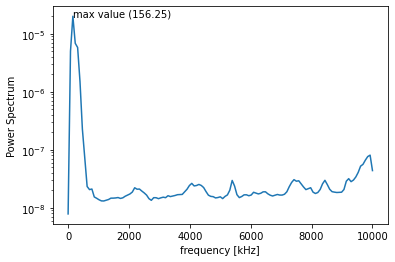


Velocity:  4.685329395999999
Max Frequency value:  312.5


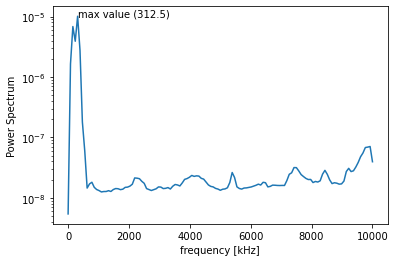


Velocity:  4.673520895999999
Max Frequency value:  156.25


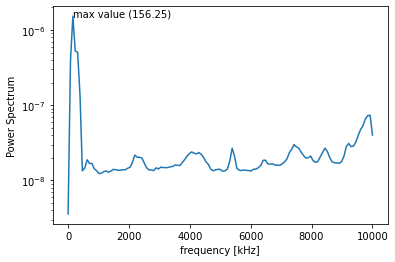

In [12]:
#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,700000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

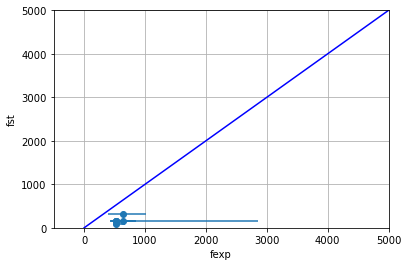

In [13]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')